In [1]:
import matplotlib.pyplot as plt
import cv2
%matplotlib inline

In [2]:
cat4 = cv2.imread('CATS_DOGS/train/CAT/4.jpg')

In [4]:
cat4 = cv2.cvtColor(cat4, cv2.COLOR_BGR2RGB)

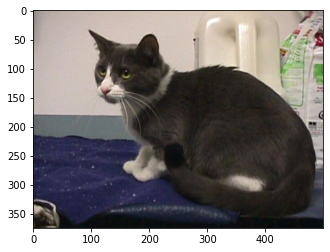

In [5]:
plt.imshow(cat4)

In [6]:
cat4.shape

(375, 500, 3)

In [7]:
dog = cv2.imread('CATS_DOGS/train/DOG/2.jpg')

In [8]:
dog = cv2.cvtColor(dog, cv2.COLOR_BGR2RGB)

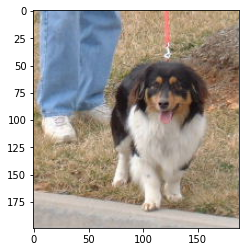

In [9]:
plt.imshow(dog)

In [10]:
dog.shape

(199, 188, 3)

In [11]:
from keras.preprocessing.image import ImageDataGenerator

In [12]:
image_gen = ImageDataGenerator(rotation_range=30, width_shift_range=0.1, height_shift_range=0.1, rescale=1/255, shear_range=0.2,
                              zoom_range=0.2, horizontal_flip=True, fill_mode='nearest')

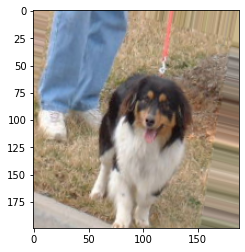

In [16]:
plt.imshow(image_gen.random_transform(dog))

In [17]:
image_gen.flow_from_directory('CATS_DOGS/train/')

Found 18743 images belonging to 2 classes.


In [19]:
input_shape = (150,150,3)

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Conv2D, MaxPooling2D, Flatten

In [24]:
model = Sequential()

# 1st Convolutional layer
model.add(Conv2D(filters=32, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 2nd Convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# 3rd Convolutional layer
model.add(Conv2D(filters=64, kernel_size=(3,3), input_shape=(150,150,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))

# transforming form 2D to 1D
model.add(Flatten())

# Dense layer (128,256,512)
model.add(Dense(128))
# Activation function
model.add(Activation('relu'))

# Dropout layer (helps to reduce overfitting by randomly turning neurons off during training)
model.add(Dropout(0.5)) # 50% of the neurons off randomly during training

# output
model.add(Dense(1)) # 1 because only 2 classes i.e. cats and dogs
# Activation function
model.add(Activation('sigmoid'))

In [25]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [26]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 34, 34, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 17, 17, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 18496)            

In [27]:
batch_size = 16

train_image_gen = image_gen.flow_from_directory('CATS_DOGS/train', target_size=input_shape[:2], batch_size=batch_size, 
                                                class_mode='binary')

Found 18743 images belonging to 2 classes.


In [28]:
test_image_gen = image_gen.flow_from_directory('CATS_DOGS/test', target_size=input_shape[:2], batch_size=batch_size, 
                                                class_mode='binary')

Found 6251 images belonging to 2 classes.


In [29]:
train_image_gen.class_indices

{'CAT': 0, 'DOG': 1}

In [30]:
results = model.fit_generator(train_image_gen, epochs=1, steps_per_epoch=150, validation_data=test_image_gen, 
                              validation_steps=12)

Instructions for updating:
Please use Model.fit, which supports generators.
150/150 [==============================] - 131s 873ms/step - loss: 0.6962 - accuracy: 0.5171 - val_loss: 0.6788 - val_accuracy: 0.5417


In [32]:
results.history['accuracy']

[0.5170833468437195]

In [33]:
from keras.models import load_model

In [34]:
# loading the model
new_model = load_model('cat_dog_100epochs.h5')

In [35]:
dog_file = 'CATS_DOGS/test/DOG/10005.jpg'

In [36]:
from keras.preprocessing import image

In [37]:
dog_img = image.load_img(dog_file, target_size=(150,150))

In [38]:
dog_img = image.img_to_array(dog_img)

In [39]:
dog_img.shape

(150, 150, 3)

In [40]:
import numpy as np
dog_img = np.expand_dims(dog_img, axis=0)

In [41]:
dog_img.shape

(1, 150, 150, 3)

In [43]:
dog_img.max()

255.0

In [44]:
# normalization
dog_img = dog_img / 255

In [45]:
model.predict_classes(dog_img)

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([[1]])

In [46]:
model.predict(dog_img) # gives us the probability

array([[0.6038538]], dtype=float32)

In [49]:
cat_file = 'CATS_DOGS/test/CAT/10008.jpg'

In [50]:
cat_img = image.load_img(cat_file, target_size=(150,150))

In [51]:
cat_img = image.img_to_array(cat_img)

In [52]:
cat_img.shape

(150, 150, 3)

In [53]:
cat_img = np.expand_dims(cat_img, axis=0)

In [54]:
cat_img.shape

(1, 150, 150, 3)

In [57]:
cat_img.max()

1.0

In [60]:
model.predict_classes(cat_img)

array([[0]])